Loading data...

Results
Final Training Error: 0.0000, Validation Error: 0.0144, Test Accuracy: 0.9889


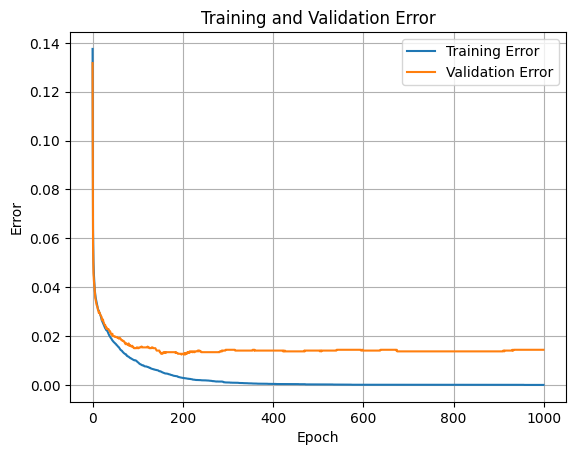

Generating confusion matrix...



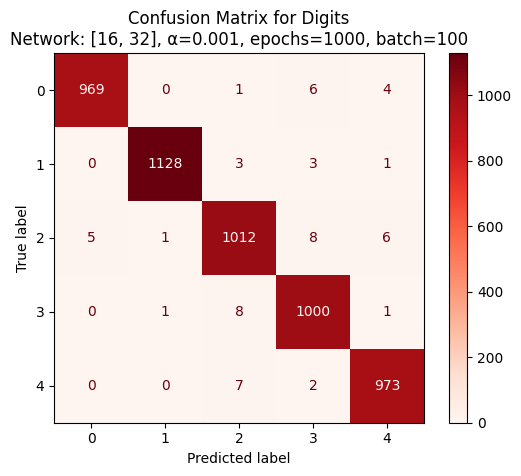

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.exceptions import ConvergenceWarning


# Load the MNIST dataset
def load_and_preprocess_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    train_df = train_df[train_df['label'] < 5]
    test_df = test_df[test_df['label'] < 5]

    X_train_full = train_df.drop('label', axis=1) / 255.0
    y_train_full = train_df['label']
    X_test = test_df.drop('label', axis=1) / 255.0
    y_test = test_df['label']

    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

def train_mlp(X_train, y_train, X_val, y_val, hidden_layers=(16, 32), learning_rate=0.001, batch_size=100, num_epochs=1000):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,
                        learning_rate_init=learning_rate,
                        max_iter=1,
                        batch_size=batch_size,
                        solver='sgd',
                        warm_start=True,
                        random_state=42)

    train_errors = []
    val_errors = []

    for epoch in range(num_epochs):
        mlp.fit(X_train, y_train)
        train_err = 1 - accuracy_score(y_train, mlp.predict(X_train))
        val_err = 1 - accuracy_score(y_val, mlp.predict(X_val))
        train_errors.append(train_err)
        val_errors.append(val_err)

    return mlp, train_errors, val_errors

def plot_confusion_matrix(mlp, X_test, y_test):

    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
    disp.plot(cmap='Reds', values_format='d')
    plt.title("Confusion Matrix for Digits\nNetwork: [16, 32], α=0.001, epochs=1000, batch=100")
    plt.show()

def main():
    warnings.filterwarnings('ignore', category=ConvergenceWarning)
    # Load and preprocess data
    print("Loading data...")
    X_train, X_val, X_test, y_train, y_val, y_test = load_and_preprocess_data("mnist_train.csv", "mnist_test.csv")

    # Train the model
    mlp, train_errors, val_errors = train_mlp(X_train, y_train, X_val, y_val)
    test_acc = accuracy_score(y_test, mlp.predict(X_test))

    # Print results
    print("\nResults")
    print(f"Final Training Error: {train_errors[-1]:.4f}, Validation Error: {val_errors[-1]:.4f}, Test Accuracy: {test_acc:.4f}")

    # Plot learning curves
    plt.figure()
    plt.plot(train_errors, label='Training Error')
    plt.plot(val_errors, label='Validation Error')
    plt.title('Training and Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create and plot confusion matrix for test set
    print("Generating confusion matrix...\n")
    plot_confusion_matrix(mlp, X_test, y_test)

if __name__ == "__main__":
    main()